In [1]:
import torch
from torch_geometric.data import Data
# draw the graph
import networkx as nx
import matplotlib.pyplot as plt
# summary
from torchinfo import summary
# graphnet
from graphnet.models.gnn import DynEdgeJINST

/home/xt/.local/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


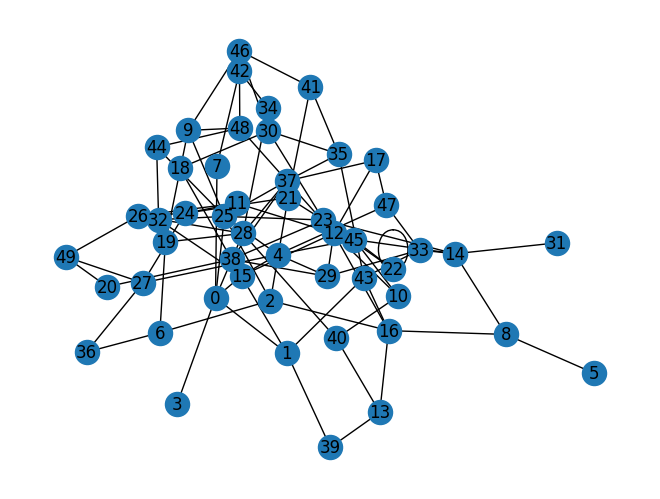

In [14]:
# 50 nodes, each node has 6 features
x = torch.rand((50, 6))
# randomly generate 100 edges in this graph
# the number of edges can be anything >= 0 and <= 50!
edge_index = torch.randint(low=0, high=50, size=(2, 100), dtype=torch.long)
# batch
batch = torch.tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      0, 0, 0, 0, 0, 0, 0, 0, 1, 2
                      ], dtype=torch.long)
# n_pulses
n_pulses = torch.tensor([1, 1, 1])
# n_pulses = torch.tensor([1.1, 1])
# put the data together by torch_geometric.data.Data
data = Data(x=x, edge_index=edge_index, batch=batch, n_pulses = n_pulses)

# draw the graph
def visualize(data):
    G = nx.Graph()
    G.add_nodes_from(range(data.x.size(0)))
    G.add_edges_from(data.edge_index.t().tolist())
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True)
    plt.show()

visualize(data)

In [15]:
model = DynEdgeJINST(nb_inputs=6)
summary(model)

Layer (type:depth-idx)                   Param #
DynEdgeJINST                             --
├─DynEdgeConv: 1-1                       --
│    └─SumAggregation: 2-1               --
│    └─Sequential: 2-2                   --
│    │    └─Linear: 3-1                  1,664
│    │    └─LeakyReLU: 3-2               --
│    │    └─Linear: 3-3                  33,024
│    │    └─LeakyReLU: 3-4               --
├─DynEdgeConv: 1-2                       --
│    └─SumAggregation: 2-3               --
│    └─Sequential: 2-4                   --
│    │    └─Linear: 3-5                  172,368
│    │    └─LeakyReLU: 3-6               --
│    │    └─Linear: 3-7                  86,272
│    │    └─LeakyReLU: 3-8               --
├─DynEdgeConv: 1-3                       --
│    └─SumAggregation: 2-5               --
│    └─Sequential: 2-6                   --
│    │    └─Linear: 3-9                  172,368
│    │    └─LeakyReLU: 3-10              --
│    │    └─Linear: 3-11                 86,272
│ 

In [16]:
output = model(data)
print(output)
print(output.shape)# [number_of_pulses, 128]

tensor([[ 2.4828e-01,  6.1622e-01, -7.2800e-03, -1.1165e-02,  8.2658e-01,
          5.9600e-01,  4.3838e-01, -1.8478e-02,  9.4075e-01,  1.8163e-01,
          3.2260e-01, -7.8661e-03, -1.0994e-02, -6.5457e-03, -4.4930e-03,
         -1.0554e-02,  1.1955e-01, -2.8673e-02,  3.4586e-01,  1.4807e+00,
         -3.4928e-03,  5.3887e-01,  9.5063e-01, -1.3392e-03, -1.6795e-02,
         -1.4260e-02, -5.9653e-03,  1.1936e+00, -3.6311e-03,  4.3779e-01,
          9.0565e-01,  6.4276e-01,  5.3310e-01, -1.4968e-02, -4.9746e-03,
         -2.6832e-02, -4.5407e-03, -1.0308e-02,  7.5525e-01,  6.7168e-01,
          6.1595e-01,  2.1345e-01,  6.8566e-01, -5.1773e-03,  9.2783e-01,
          8.5288e-01,  6.2092e-01,  2.4349e-01, -5.8990e-03,  5.8056e-01,
          2.5168e-01, -1.2700e-02,  5.0700e-01,  1.5098e-01, -8.7722e-04,
          7.8251e-01,  4.9076e-01, -3.9954e-03,  1.6459e+00, -8.5850e-03,
         -1.6155e-02,  8.3681e-01,  1.0095e+00,  1.3708e+00,  3.9609e-01,
          3.5668e-01,  7.9276e-01,  6.